In [15]:
from MeasureMatrix import fast_interaction_multiply

fast_interaction_multiply([100,100,100,100,100,100,100,100],3,[0,0,0],[1,1,1])

array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [44]:
from MeasureMatrix import fast_interaction_multiply
import numpy as np
fast_interaction_multiply([100,100,100,100,100,100,100,100],3,[0,0,0],[1,1,1])

import json

with open("qubit_data.json", 'r') as file:
    data = json.load(file)
qubit_props = data['oneQubitProperties']
num_qubits = len(qubit_props)

epsilon01 = np.zeros(num_qubits)
epsilon10 = np.zeros(num_qubits)

for qub_ind,qub in enumerate(qubit_props):
    e01 = qubit_props[qub]['oneQubitFidelity'][1]['fidelity']
    e10 = qubit_props[qub]['oneQubitFidelity'][2]['fidelity']
    epsilon01[qub_ind] = e01
    epsilon10[qub_ind] = e10



In [92]:
first = np.zeros(2**num_qubits)
first[0] = 1
(fast_interaction_multiply(first,num_qubits,epsilon01,epsilon10))

array([6.04383915e-01, 7.96047710e-03, 9.20381596e-03, ...,
       1.29047711e-32, 1.49203543e-32, 1.96519357e-34], shape=(1048576,))

In [124]:
Garnet_Connectivity = []

for i in data['twoQubitProperties']:
    stringy_list = i.split("-")
    floaty_list = [int(item)-1 for item in stringy_list]
    Garnet_Connectivity.append(floaty_list)
    Garnet_Connectivity.append(floaty_list[::-1])

Garnet_Connectivity

[[0, 1],
 [1, 0],
 [1, 4],
 [4, 1],
 [0, 3],
 [3, 0],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [3, 8],
 [8, 3],
 [4, 5],
 [5, 4],
 [5, 6],
 [6, 5],
 [5, 10],
 [10, 5],
 [2, 7],
 [7, 2],
 [7, 8],
 [8, 7],
 [7, 12],
 [12, 7],
 [4, 9],
 [9, 4],
 [8, 9],
 [9, 8],
 [9, 10],
 [10, 9],
 [9, 14],
 [14, 9],
 [6, 11],
 [11, 6],
 [10, 11],
 [11, 10],
 [11, 16],
 [16, 11],
 [8, 13],
 [13, 8],
 [12, 13],
 [13, 12],
 [13, 14],
 [14, 13],
 [13, 17],
 [17, 13],
 [10, 15],
 [15, 10],
 [14, 15],
 [15, 14],
 [15, 16],
 [16, 15],
 [15, 19],
 [19, 15],
 [14, 18],
 [18, 14],
 [17, 18],
 [18, 17],
 [18, 19],
 [19, 18]]

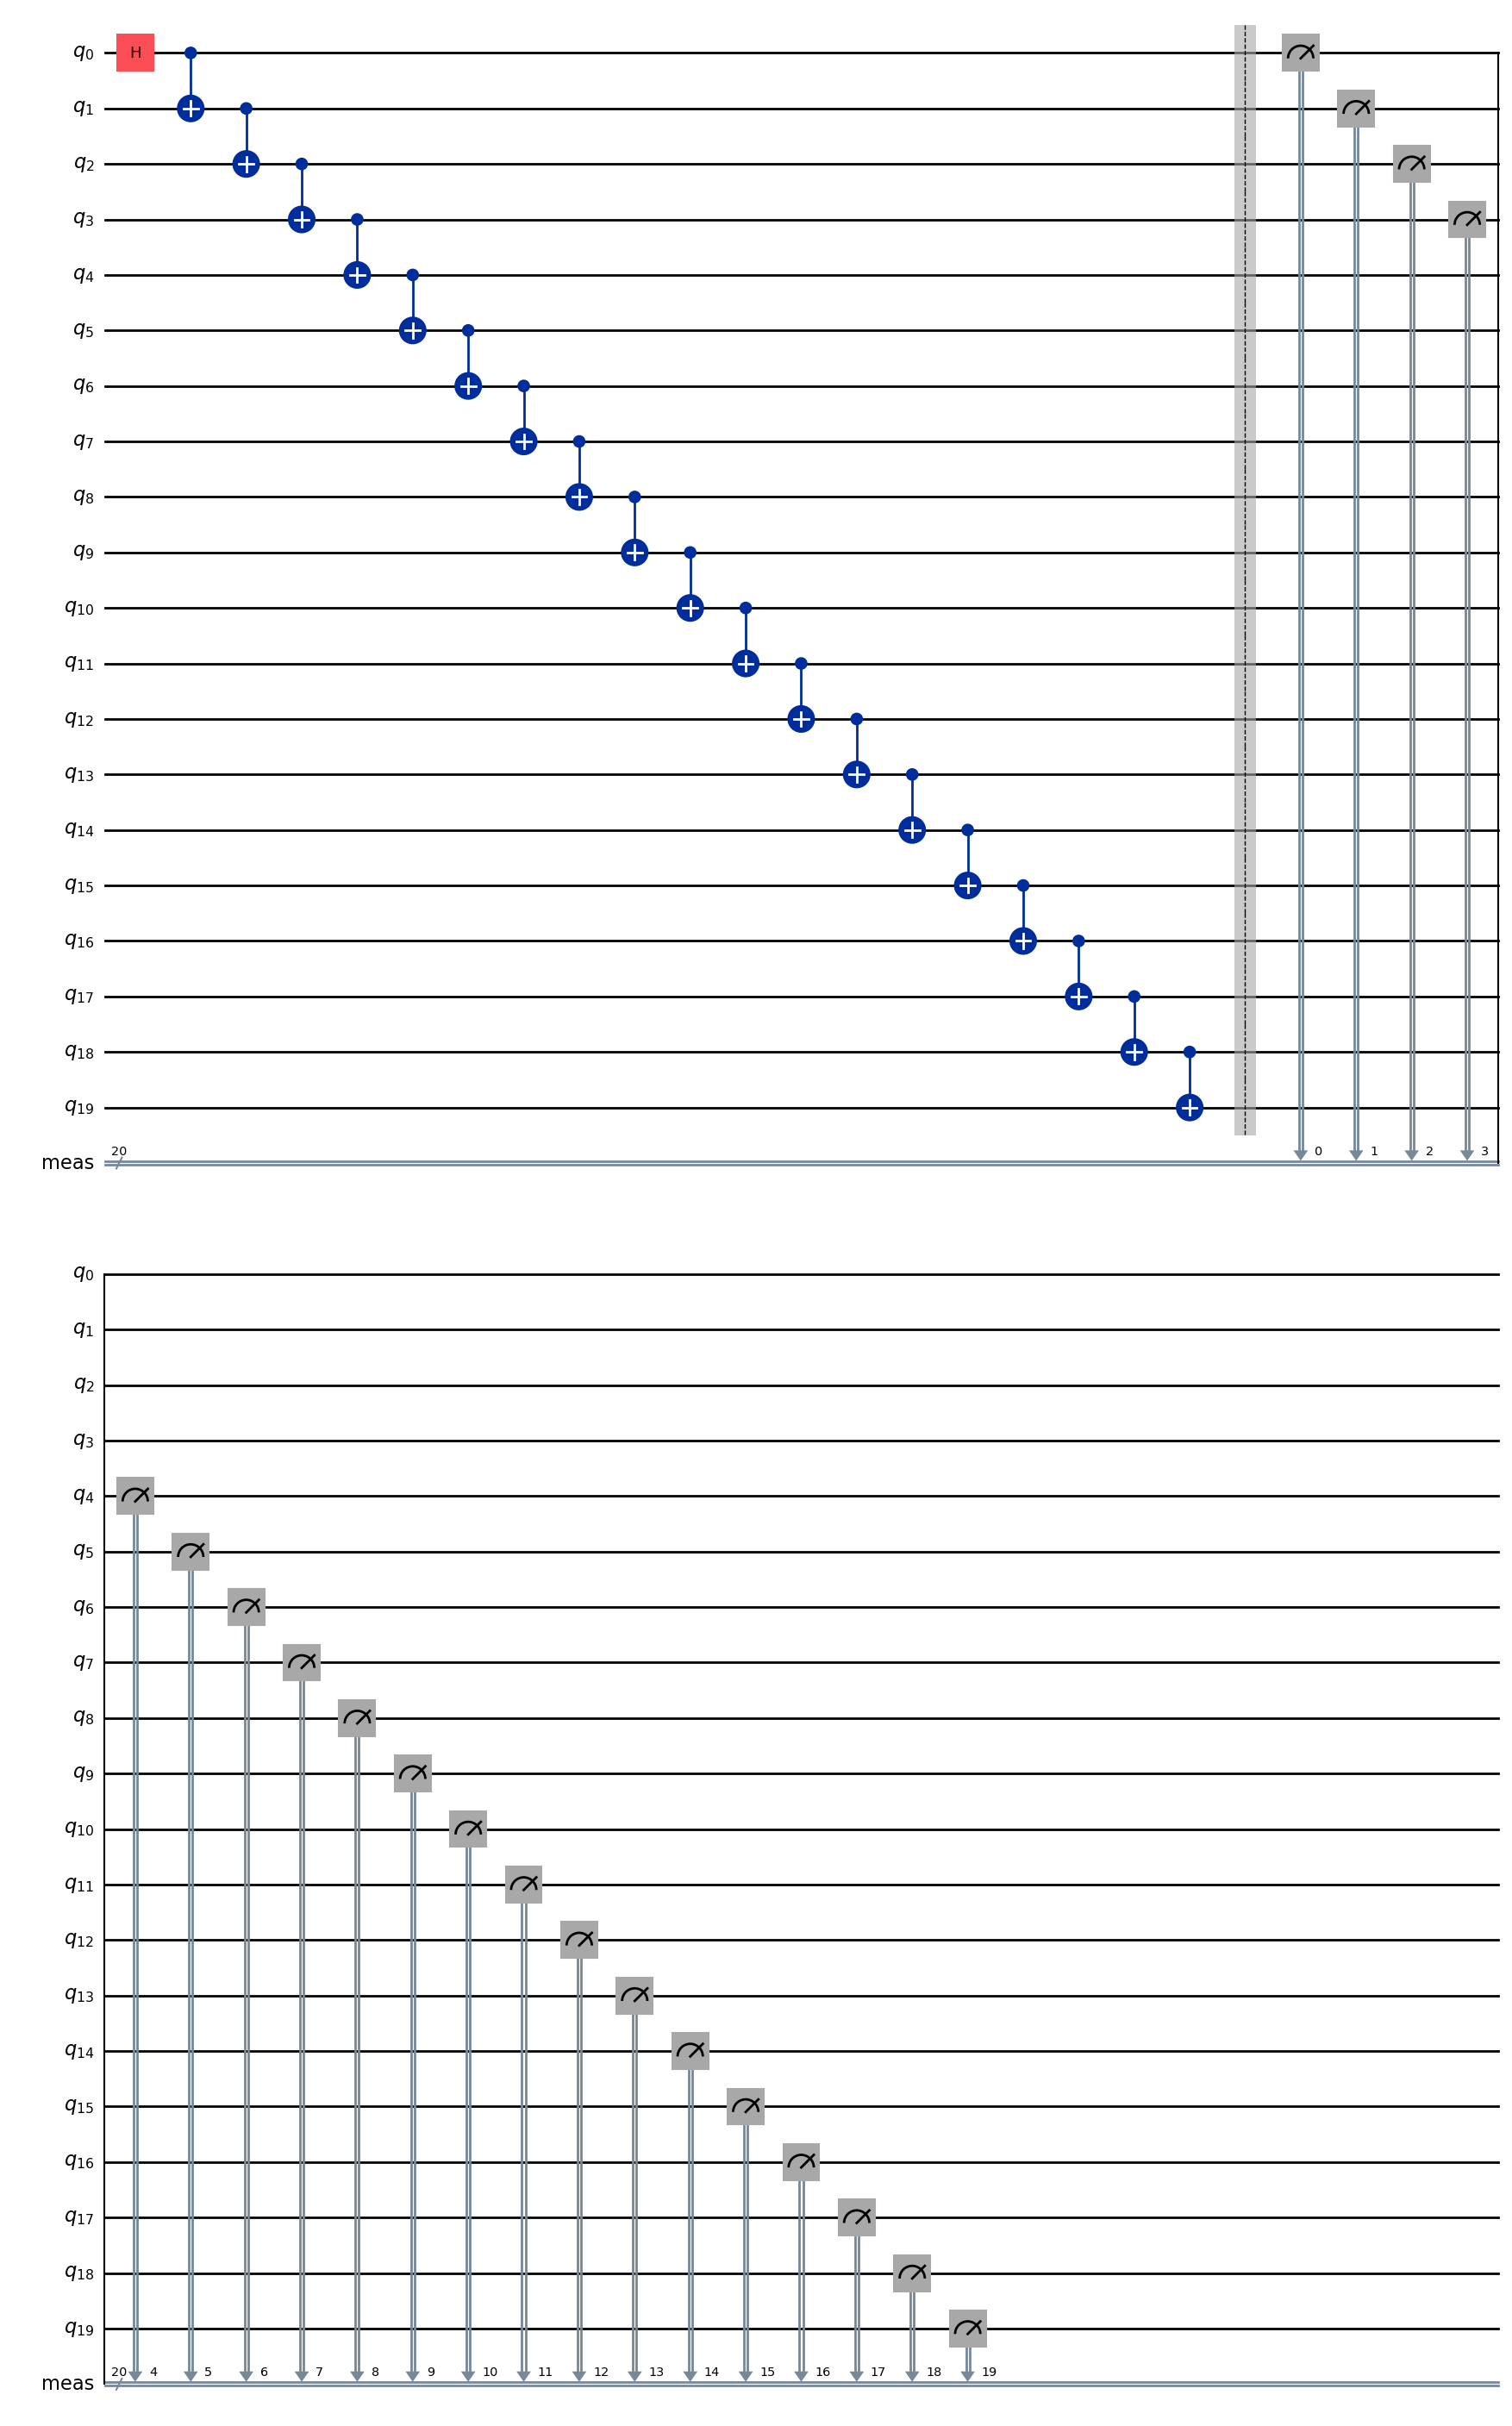

In [125]:
from qiskit import QuantumCircuit

def get_test_circuit(n_qubits=5):
    qc = QuantumCircuit(n_qubits)
    
    # 1. Create Superposition on the first qubit
    # (Tests single-qubit 'r' gate noise)
    qc.h(0)
    
    # 2. Entangle neighbors linearly (Chain)
    # (Tests two-qubit 'cx' crosstalk/ZZ noise)
    for i in range(n_qubits - 1):
        qc.cx(i, i+1)
        
    # 3. Measurement (Optional, depending on if your simulator needs it)
    qc.measure_all()
    
    return qc

# Generate and print
qc = get_test_circuit(num_qubits)
qc.draw("mpl")

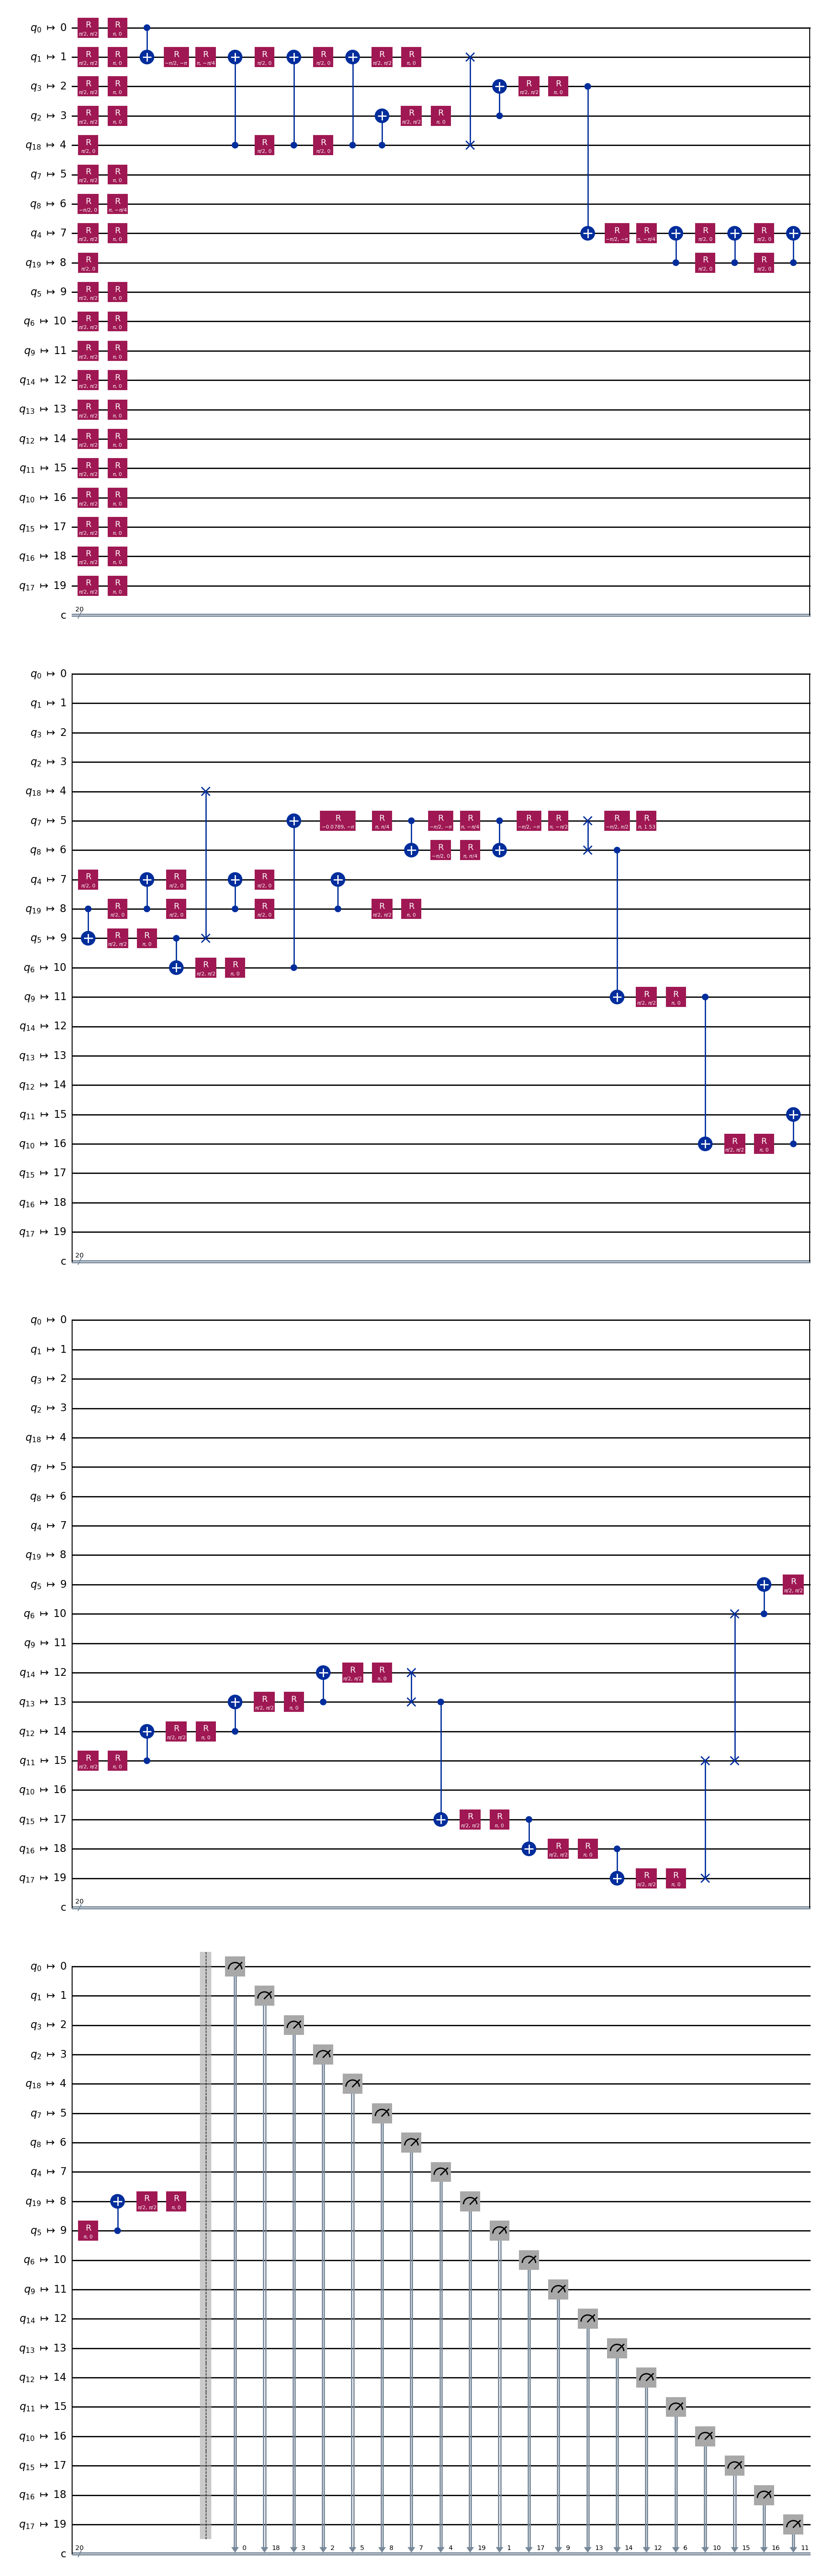

In [134]:
from mqt.qmap.plugins.qiskit.sc import compile
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2

backend = GenericBackendV2(
    num_qubits = num_qubits,
    basis_gates = ['r', 'rz', 'cz'],
    coupling_map = Garnet_Connectivity
)

# compile circuit to the target architecture

optimization_level = 2
circ_comp = transpile(qc, backend=backend, optimization_level=optimization_level)
circ_comp.draw(output="mpl", fold=-1, style="iqp")

circ_mapped, results = compile(circ_comp, backend)
circ_mapped.draw(output="mpl")